#                                              INTRODUCTION

La pollution de l'air pose un risque sérieux dans le monde entier. Les villes sont étouffées par le smog et les émissions dangereuses, qui nuisent à la fois à l'environnement et à la santé des populations mondiales. La région Bretagne a donc besoin de différents outils pour suivre et analyser la pollution atmosphérique à l'échelle de la région. Elle vous demande de l'aide afin de constituer une analyse d'un jeu de données qu'elle possède.

# contexte du projet :

Identifier le jeu de données répondant à l'objectif. Voir le lien ci-dessous:

​

https://data.airbreizh.asso.fr/contenu/services_didon.html#

​

Suite à la pandémie de COVID-19 qui a débuté au début de l'année 2020, la région souhaite connaître l'impact du confinement sur la pollution atmosphérique dans la région.

Réaliser un Notebook qui importe les données.
Mettre en forme et traiter les données en vue d'une cartographie.
Interpréter les résultats (et pas juste leur affichage)

# Importation des données

Importation des bibliotheques 

In [1]:
import pandas as pd # lecture de fichier
import numpy as np # maths
import matplotlib.pyplot as plt # affichage graphique
#indiquer que l'on veut voir apparaître les graphiques dans le notebook#/!\ très important, sinon on ne verrait rien.
%matplotlib inline
#importation de la librairie
import matplotlib.pyplot as plt

In [2]:
cf = pd.read_csv('bretagne.csv')
cf.head()

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cca,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cc9,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cc8,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cc7,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cc6,2021-01-01T10:00:00,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600


In [3]:
print(cf.shape)
#notre dataframe comporte 2547 lignes et 15 colonnes.

(2547, 15)


In [4]:
#énumération des colonnes
print(cf.columns)

Index(['FID', 'date_ech', 'valeur', 'qualif', 'source', 'type_zone',
       'code_zone', 'lib_zone', 'val_no2', 'val_so2', 'val_o3', 'val_pm10',
       'val_pm25', 'geom', 'couleur'],
      dtype='object')


In [5]:
#type de chaque colonne
print(cf.dtypes)

FID          object
date_ech     object
valeur        int64
qualif       object
source       object
type_zone    object
code_zone     int64
lib_zone     object
val_no2       int64
val_so2       int64
val_o3        int64
val_pm10      int64
val_pm25      int64
geom         object
couleur      object
dtype: object


Je détermine le nombre de zone sujettes aux polluants pendant la periode covid 19,il y a 7 zones .

In [6]:
len(cf.lib_zone.unique())

7

nom des zones de la colonne lib_zone

In [7]:
nom_de_ville=cf.lib_zone.unique()
nom_de_ville

array(['CA Saint-Brieuc Armor', 'CA Golfe du Morbihan - Vannes',
       'CA Quimper Bretagne Occidentale', 'Rennes Métropole',
       'CA du Pays de Saint-Malo (Saint-Malo Agglomération)',
       'Brest Métropole', 'CA Lorient'], dtype=object)

In [8]:
#modif sur la date (colonne date_ech) pour afficher seulement le jour,le mois et l'année.
df1=cf.replace(r'T10:00:00', '', regex=True)
df1

,FID,date_ech,valeur,qualif,source,type_zone,code_zone,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom,couleur
0,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cca,2021-01-01,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148),#99E600
1,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cc9,2021-01-01,3,Bon,Air Breizh,EPCI,200067932,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645),#99E600
2,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cc8,2021-01-01,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281),#99E600
3,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cc7,2021-01-01,3,Bon,Air Breizh,EPCI,243500139,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317),#99E600
4,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-2cc6,2021-01-01,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687),#99E600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2542,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-20b6,2020-01-01,3,Bon,Air Breizh,EPCI,200069409,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148),#99E600
2543,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-20b5,2020-01-01,3,Bon,Air Breizh,EPCI,200068120,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281),#99E600
2544,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-20b4,2020-01-01,3,Bon,Air Breizh,EPCI,200042174,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848),#99E600
2545,ind_bretagne_agglo.fid--15c6355_177b9fde18d_-20b3,2020-01-01,3,Bon,Air Breizh,EPCI,243500782,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687),#99E600


In [9]:
#selection des colonnes qui nous intéressent
af = df1[['date_ech', 'valeur', 'qualif', 'lib_zone', 'val_no2', 'val_so2', 'val_o3', 'val_pm10', 'val_pm25','geom']].copy()
af.head()

,date_ech,valeur,qualif,lib_zone,val_no2,val_so2,val_o3,val_pm10,val_pm25,geom
0,2021-01-01,3,Bon,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148)
1,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645)
2,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281)
3,2021-01-01,3,Bon,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317)
4,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687)


In [10]:
#Je modifie le nom polluants pour plus de cohérence .
#print("\nOriginal DataFrame")
#print(pd.DataFrame(af))
af.rename(columns={'val_no2': 'no2', 'val_so2': 'so2' , 'val_o3': 'o3','val_pm10':'pm10','val_pm25':'pm25'}
                    , inplace=True)

#print("\nModified DataFrame")
#print(pd.DataFrame(af))

In [11]:
moyenne = af.groupby('date_ech')['valeur'].mean()
moyenne.head()

date_ech
2020-01-01    3.000000
2020-01-02    3.142857
2020-01-03    3.428571
2020-01-04    3.142857
2020-01-05    4.000000
Name: valeur, dtype: float64

In [12]:
#Supprimez les lignes où au moins un élément est manquant.

af.dropna()

,date_ech,valeur,qualif,lib_zone,no2,so2,o3,pm10,pm25,geom
0,2021-01-01,3,Bon,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148)
1,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645)
2,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281)
3,2021-01-01,3,Bon,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317)
4,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687)
...,...,...,...,...,...,...,...,...,...,...
2542,2020-01-01,3,Bon,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148)
2543,2020-01-01,3,Bon,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281)
2544,2020-01-01,3,Bon,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848)
2545,2020-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687)


In [13]:
#verifions si il y a des valeurs nulles
df_check=af.isnull().sum()

print(df_check)
#0 indique qu'il n'y en a pas .

date_ech    0
valeur      0
qualif      0
lib_zone    0
no2         0
so2         0
o3          0
pm10        0
pm25        0
geom        0
dtype: int64


la dataset ne contient pas de valeurs nulles.

Affichage des variables quantitatives

In [14]:
quantitatives = [var for var in af.columns if af[var].dtype!='O']

print('Il y a {} variables quantitatives\n'.format(len(quantitatives)))

print('Les variables quantitatives sont:', quantitatives)

Il y a 6 variables quantitatives

Les variables quantitatives sont: ['valeur', 'no2', 'so2', 'o3', 'pm10', 'pm25']


In [15]:
#transformation de la colone date_ech en format date
af['date_ech'] = pd.to_datetime(af['date_ech']).dt.date
af.head()

,date_ech,valeur,qualif,lib_zone,no2,so2,o3,pm10,pm25,geom
0,2021-01-01,3,Bon,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148)
1,2021-01-01,3,Bon,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645)
2,2021-01-01,3,Bon,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281)
3,2021-01-01,3,Bon,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317)
4,2021-01-01,3,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687)


# Pollution atmosphérique : quels sont les risques ?

Chaque jour, un adulte inhale 10 000 à 20 000 litres d’air en fonction de sa morphologie, de ses activités… Outre l’oxygène (O2) et le diazote (N2), qui représentent en moyenne 99 % de sa composition, cet air contient des polluants d’origine naturelle (embruns marins, poussières, pollens…) ou résultant d’activités humaines (trafic routier, production d’énergie, industrie, agriculture…). 
La pénétration de ces polluants dans l’organisme peut avoir des conséquences sur la santé à court et long term

# Impacts des polluants sur la santé et l'environnement:

no2: Une fois dans l'air, le monoxyde d'azote (NO) devient du dioxyde d'azote (NO2), gaz irritant pour les bronches et favorisant les crises d'asthmes et les infections pulmonaires. Les personnes asthmatiques et les jeunes enfants sont plus sensibles à ce polluant.

so2:Des concentrations trop élevées en SO2 peuvent être à l'origine de l'acidification de l'environnement. Une fois émis dans l'air et en présence d'eau, le SO2 se transforme en acide sulfurique H2SO4 qui contribue au phénomène des pluies acides

o3:ozone:Il s'agit d'une variété gazeuse allotropique de l'oxygène (O), plus lourde que l'air.
On parle du ''bon'' c'est-à-dire ozone stratosphérique et du ''mauvais''(lié à l'activité humaine), c'est-à-dire ozone à la surface de la terre, également appelé ozone troposphérique.

pm10 et pm2,5:Particules fines 


Plus une particule est fine, plus elle peut pénétrer profondément dans les voies respiratoires et donc plus sa toxicité potentielle est élevée. Les plus grosses particules (PM10) sont retenues par les voies aériennes supérieures. 

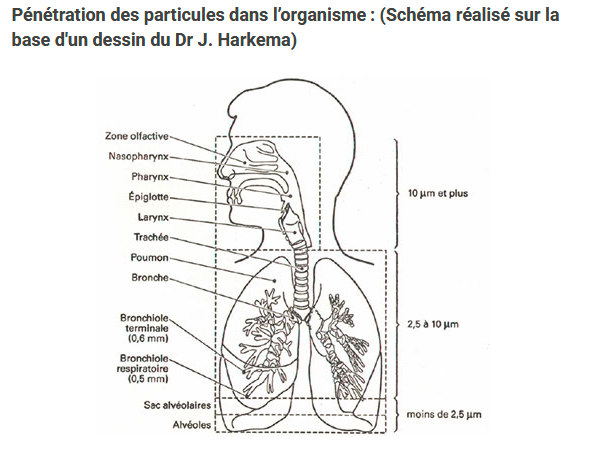

Qualité de l'air par zones(comune)et par jour

In [16]:
# Séparation pour  graphiques de qualité de l'air en fonction des zones
saint_brieuc = af.loc[af['lib_zone'] == 'CA Saint-Brieuc Armor']
morbihan = af.loc[af['lib_zone'] == 'CA Golfe du Morbihan - Vannes']
quimper = af.loc[af['lib_zone'] == 'CA Quimper Bretagne Occidentale']
rennes = af.loc[af['lib_zone'] == 'Rennes Métropole']
brest = af.loc[af['lib_zone'] == 'Brest Métropole']
lorient = af.loc[af['lib_zone'] == 'CA Lorient']
st_malo = af.loc[af['lib_zone'] == 'CA du Pays de Saint-Malo (Saint-Malo Agglomération)']

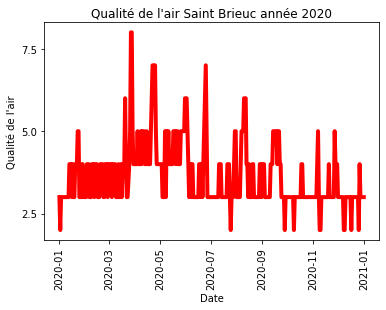

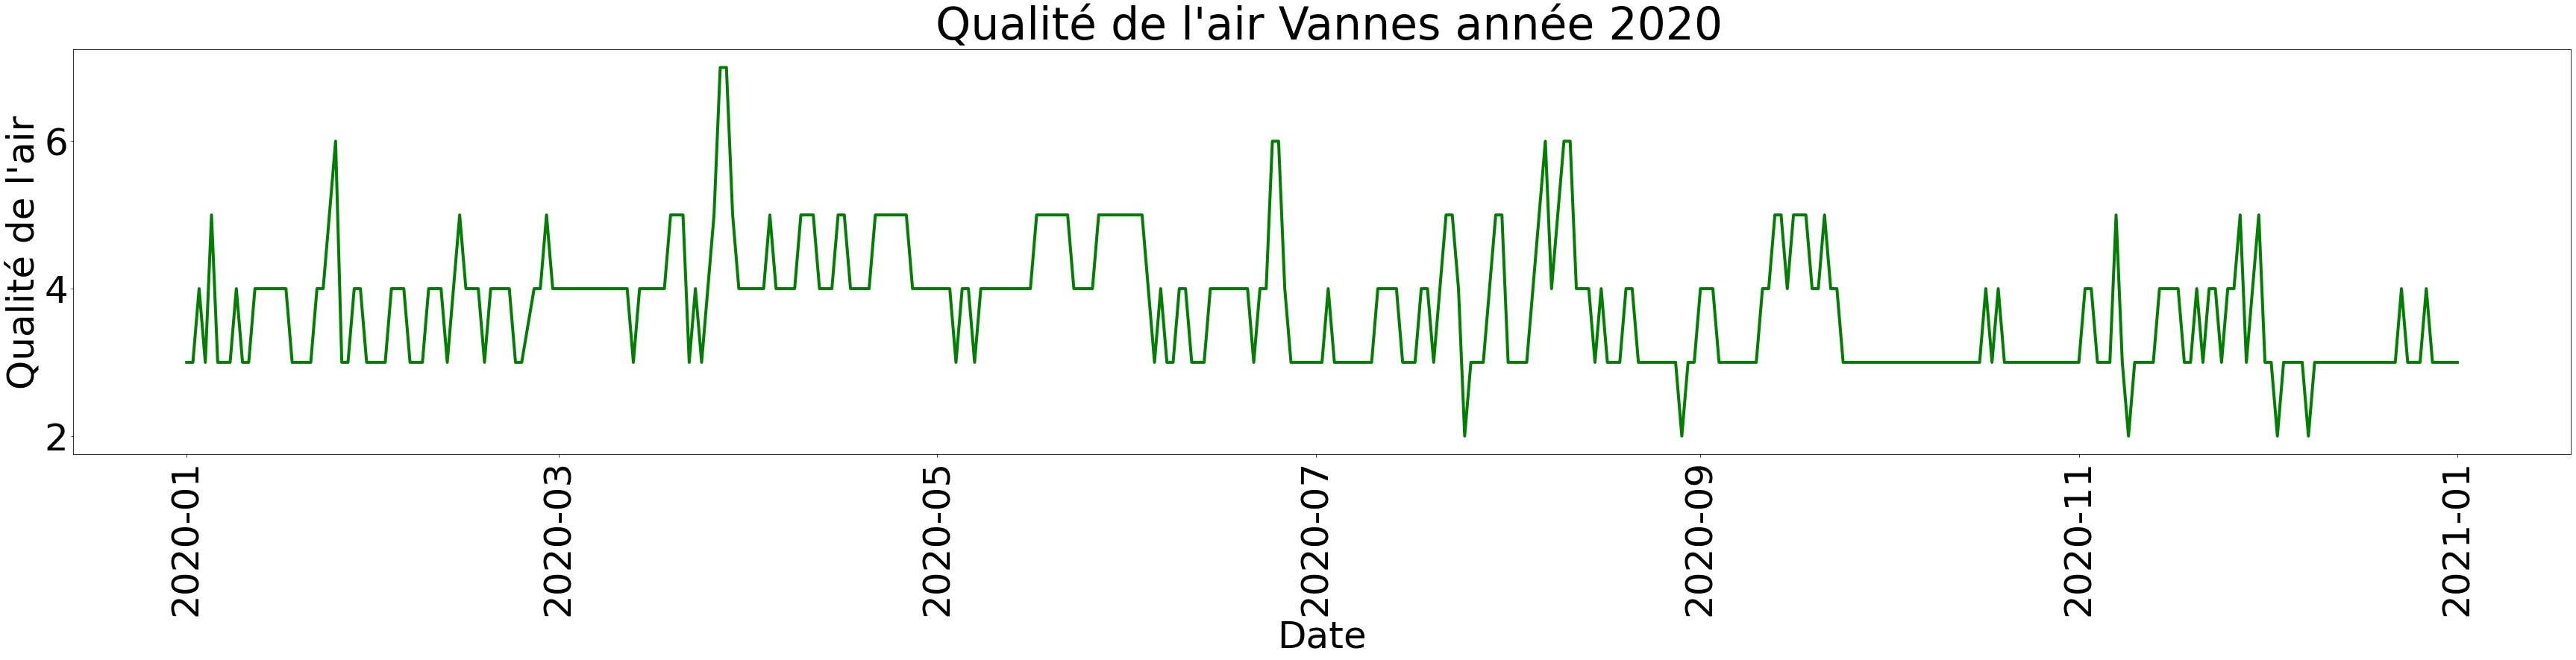

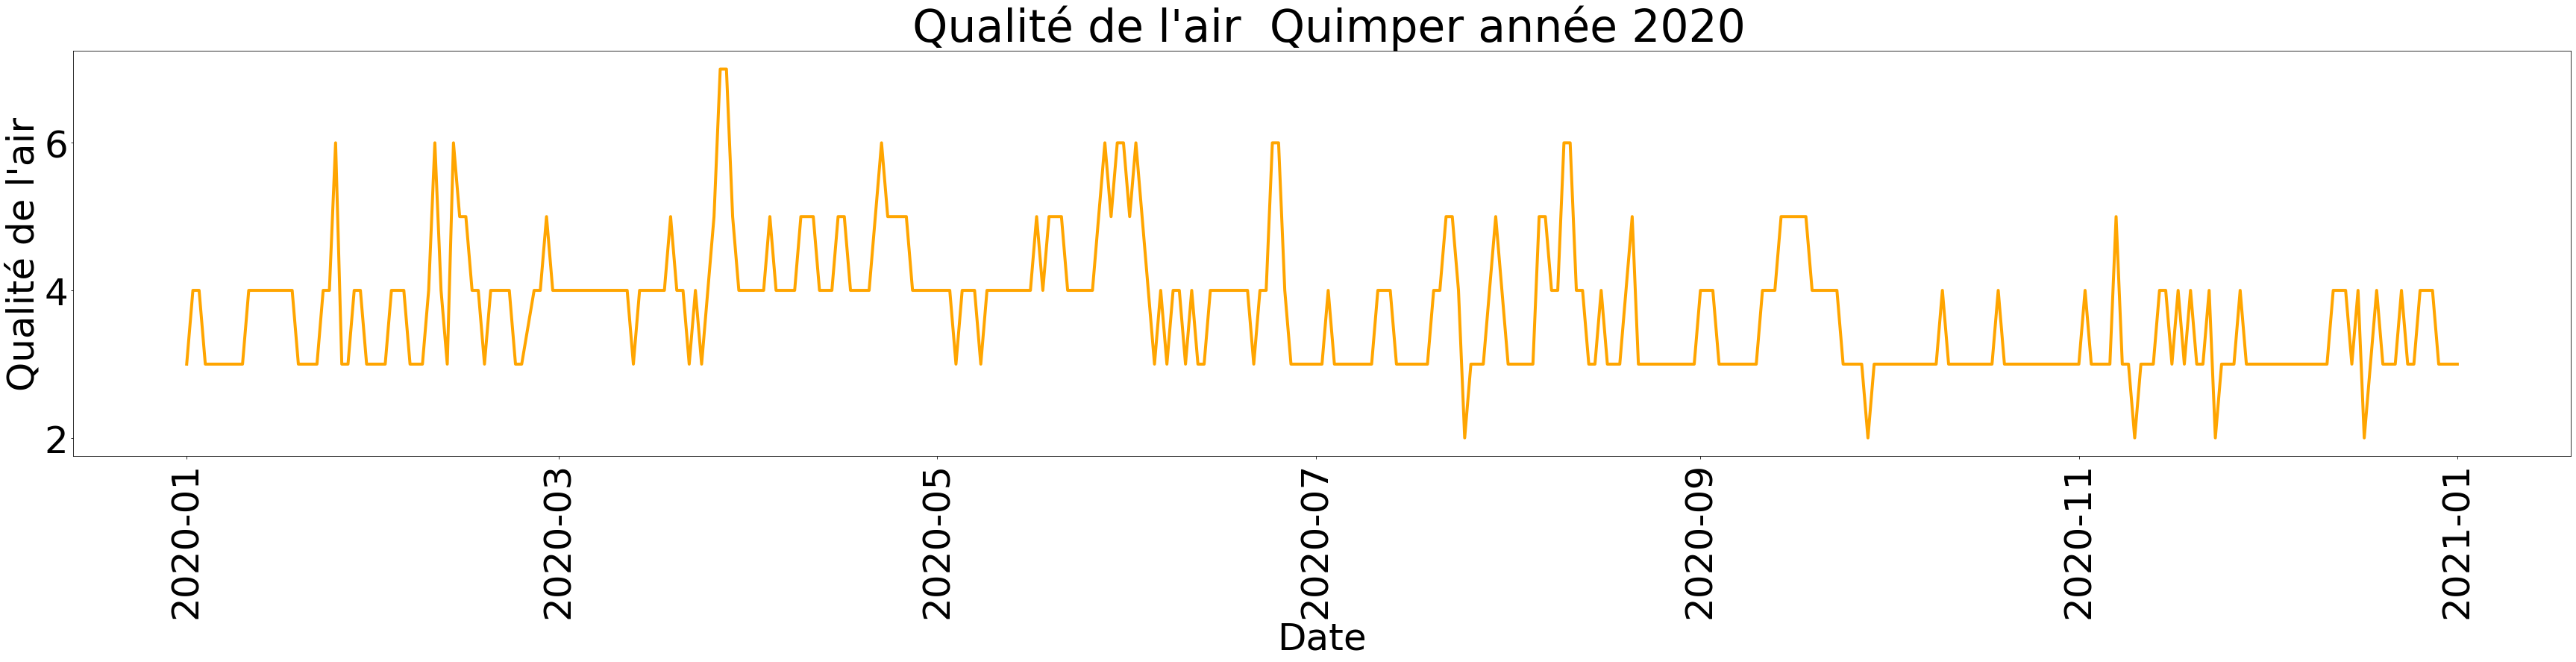

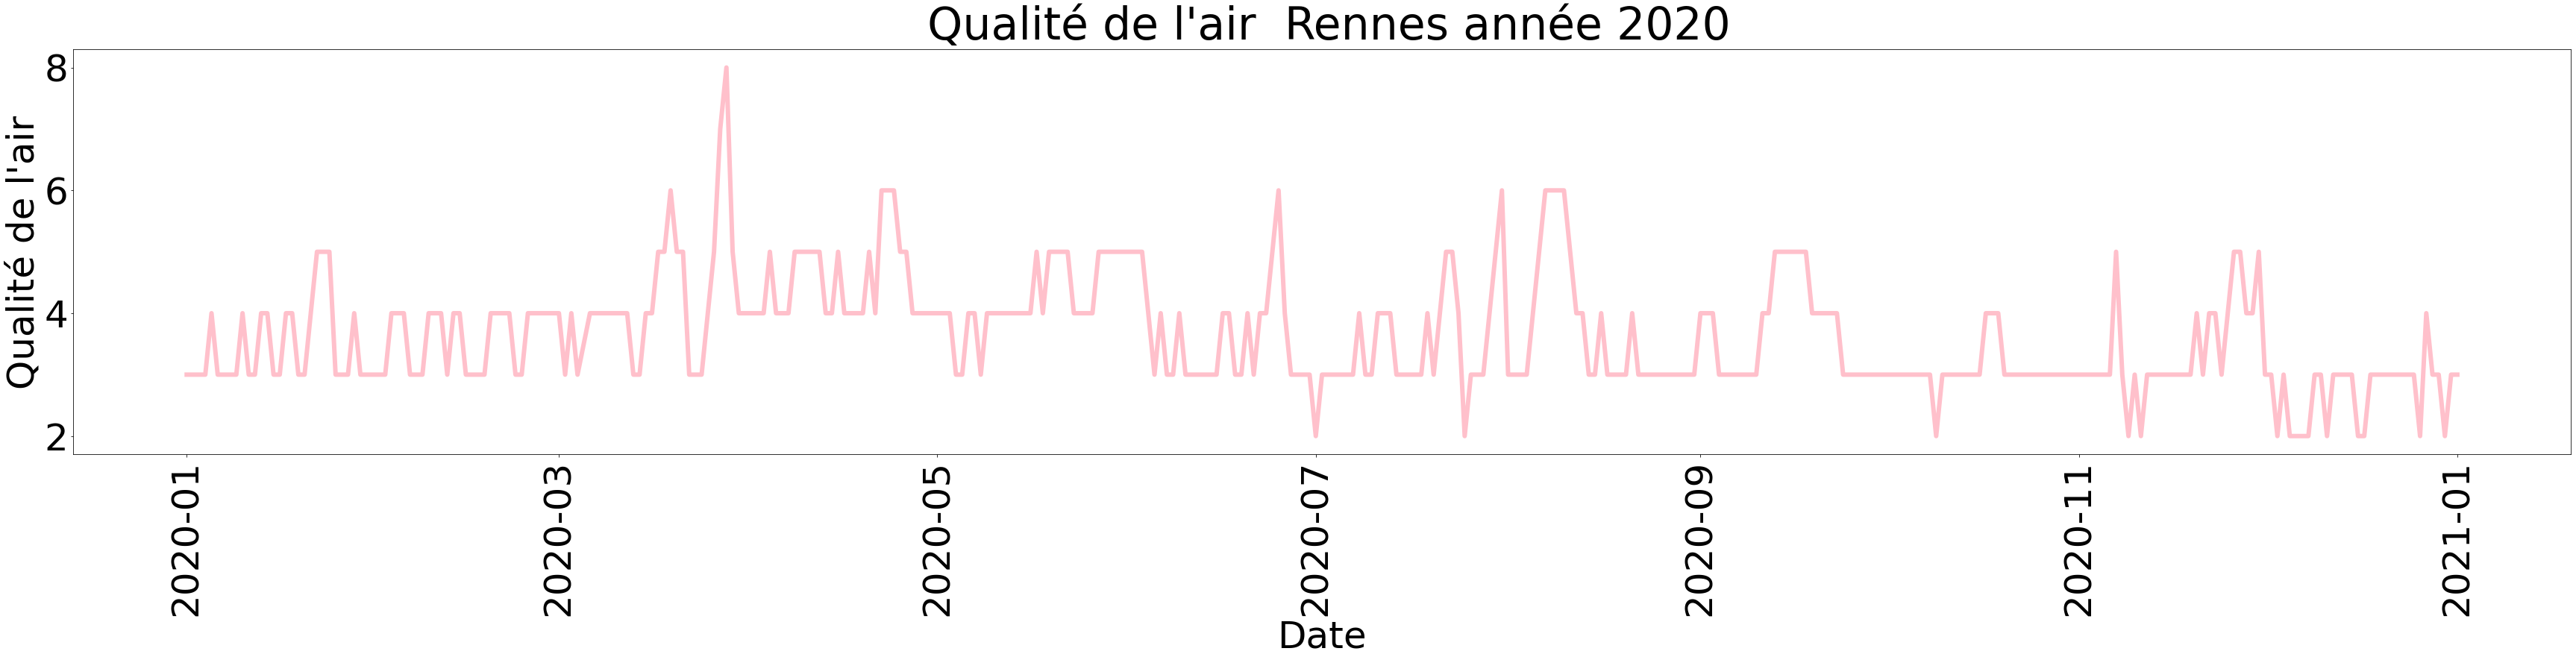

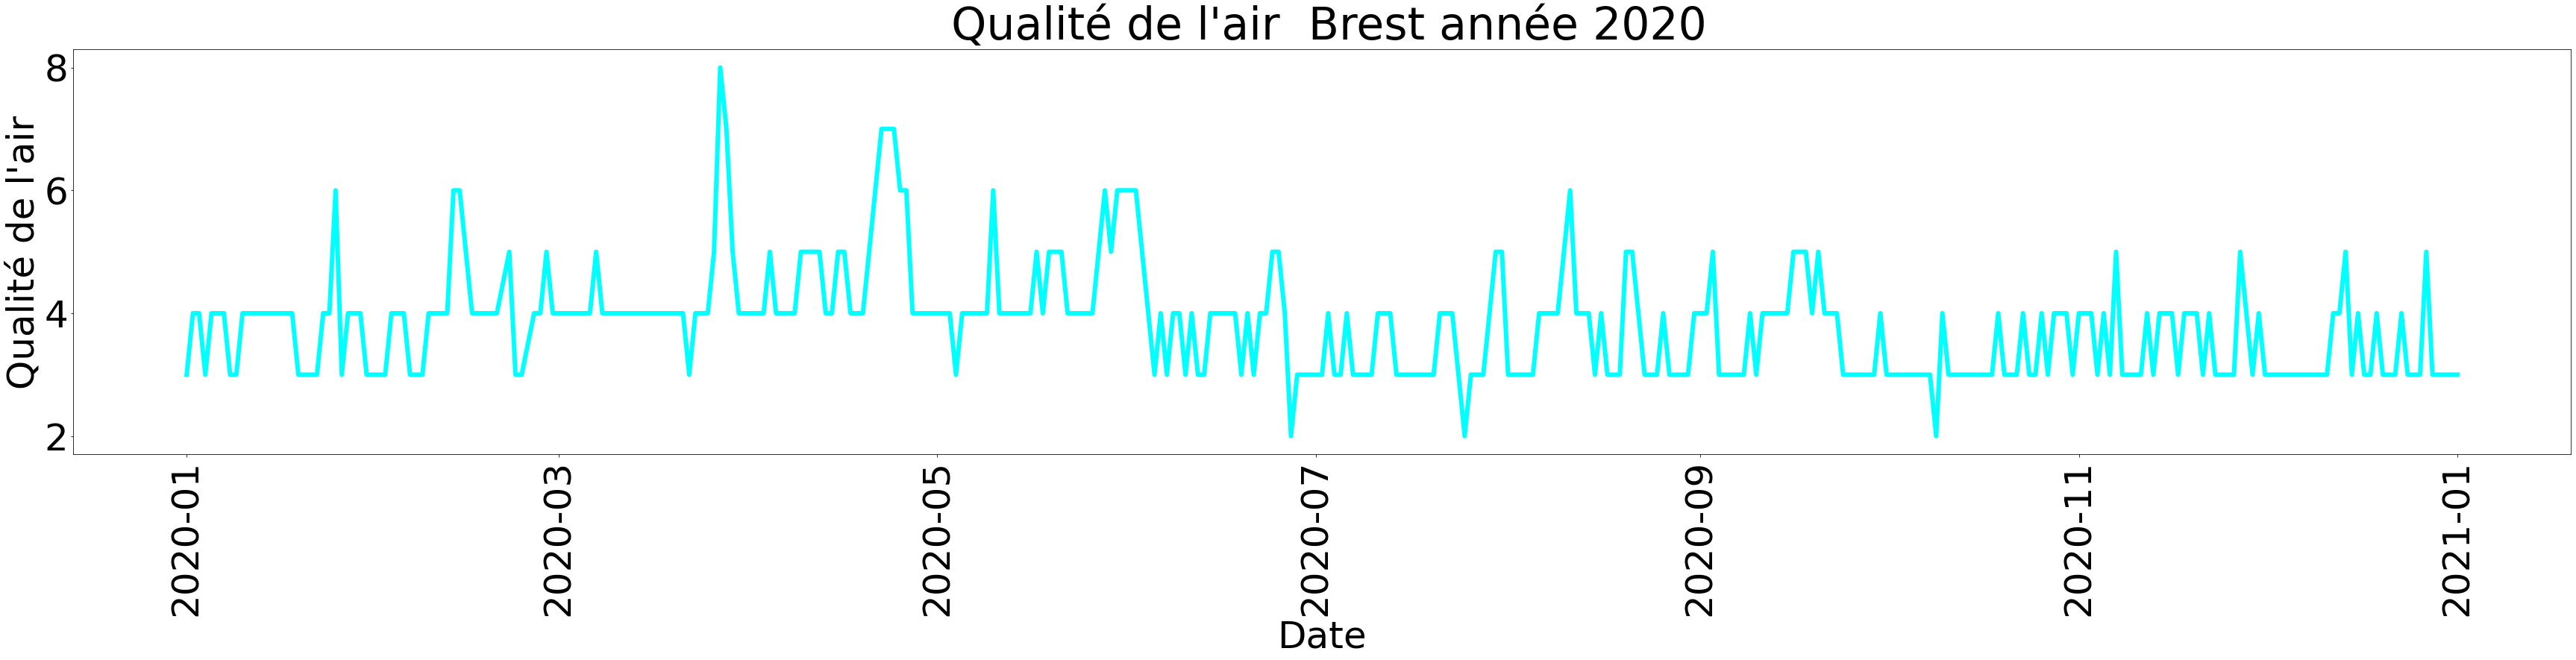

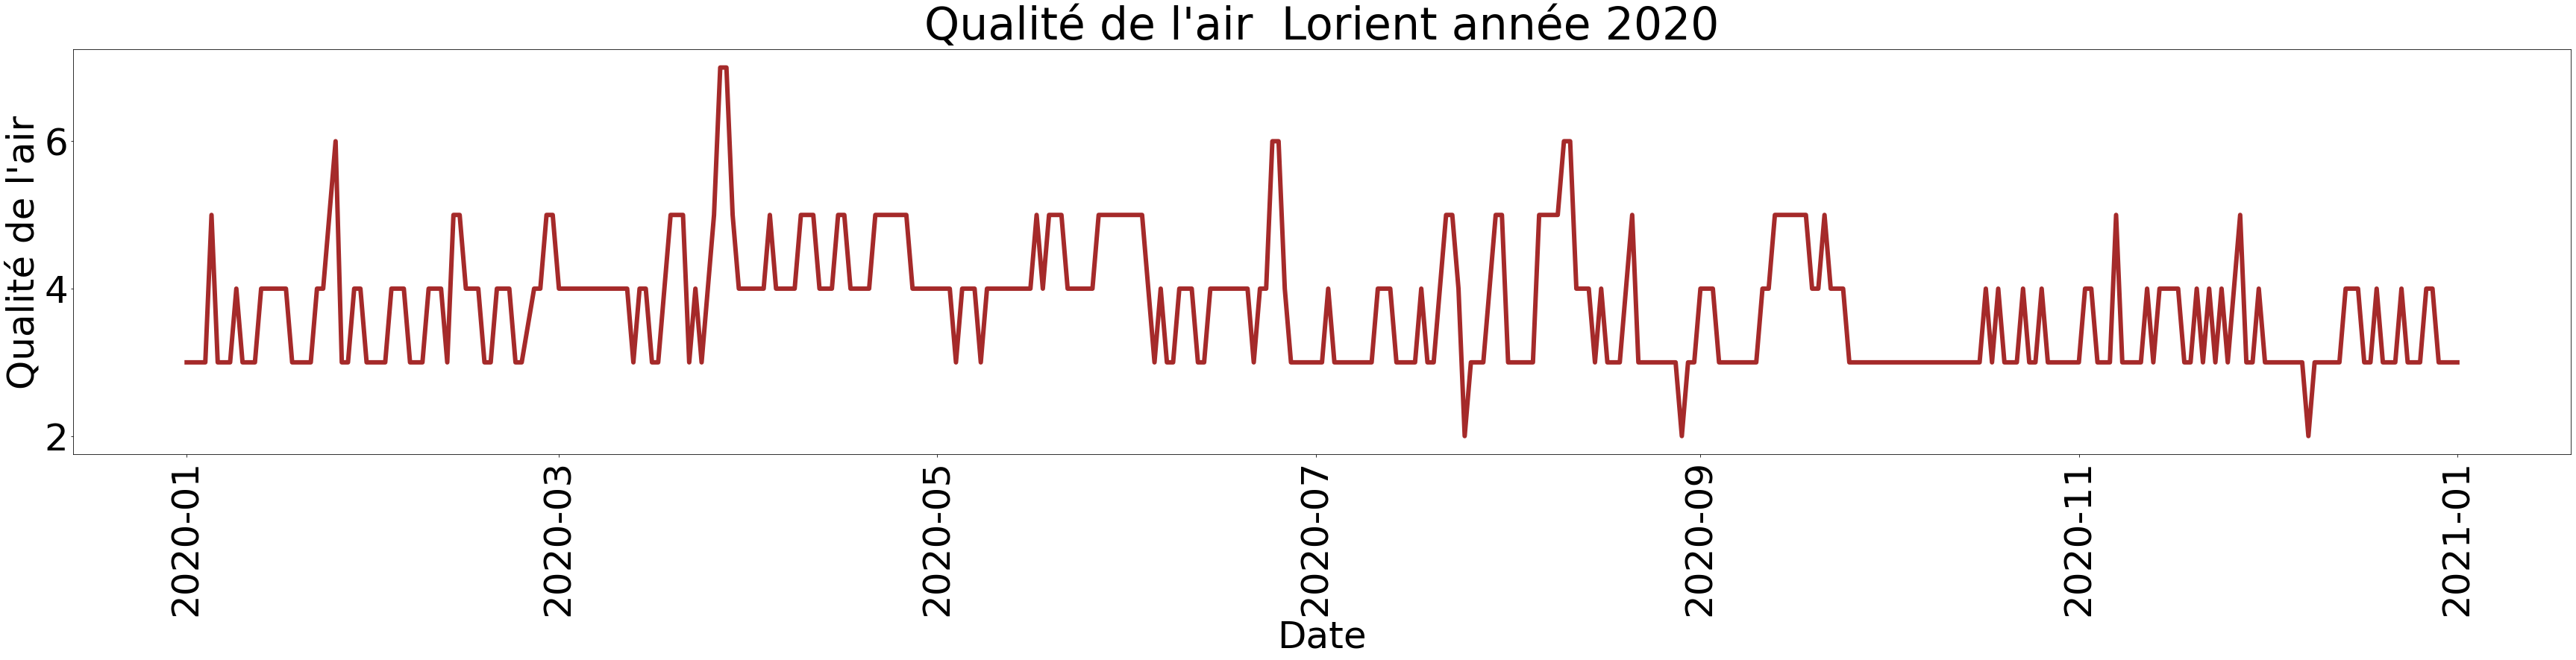

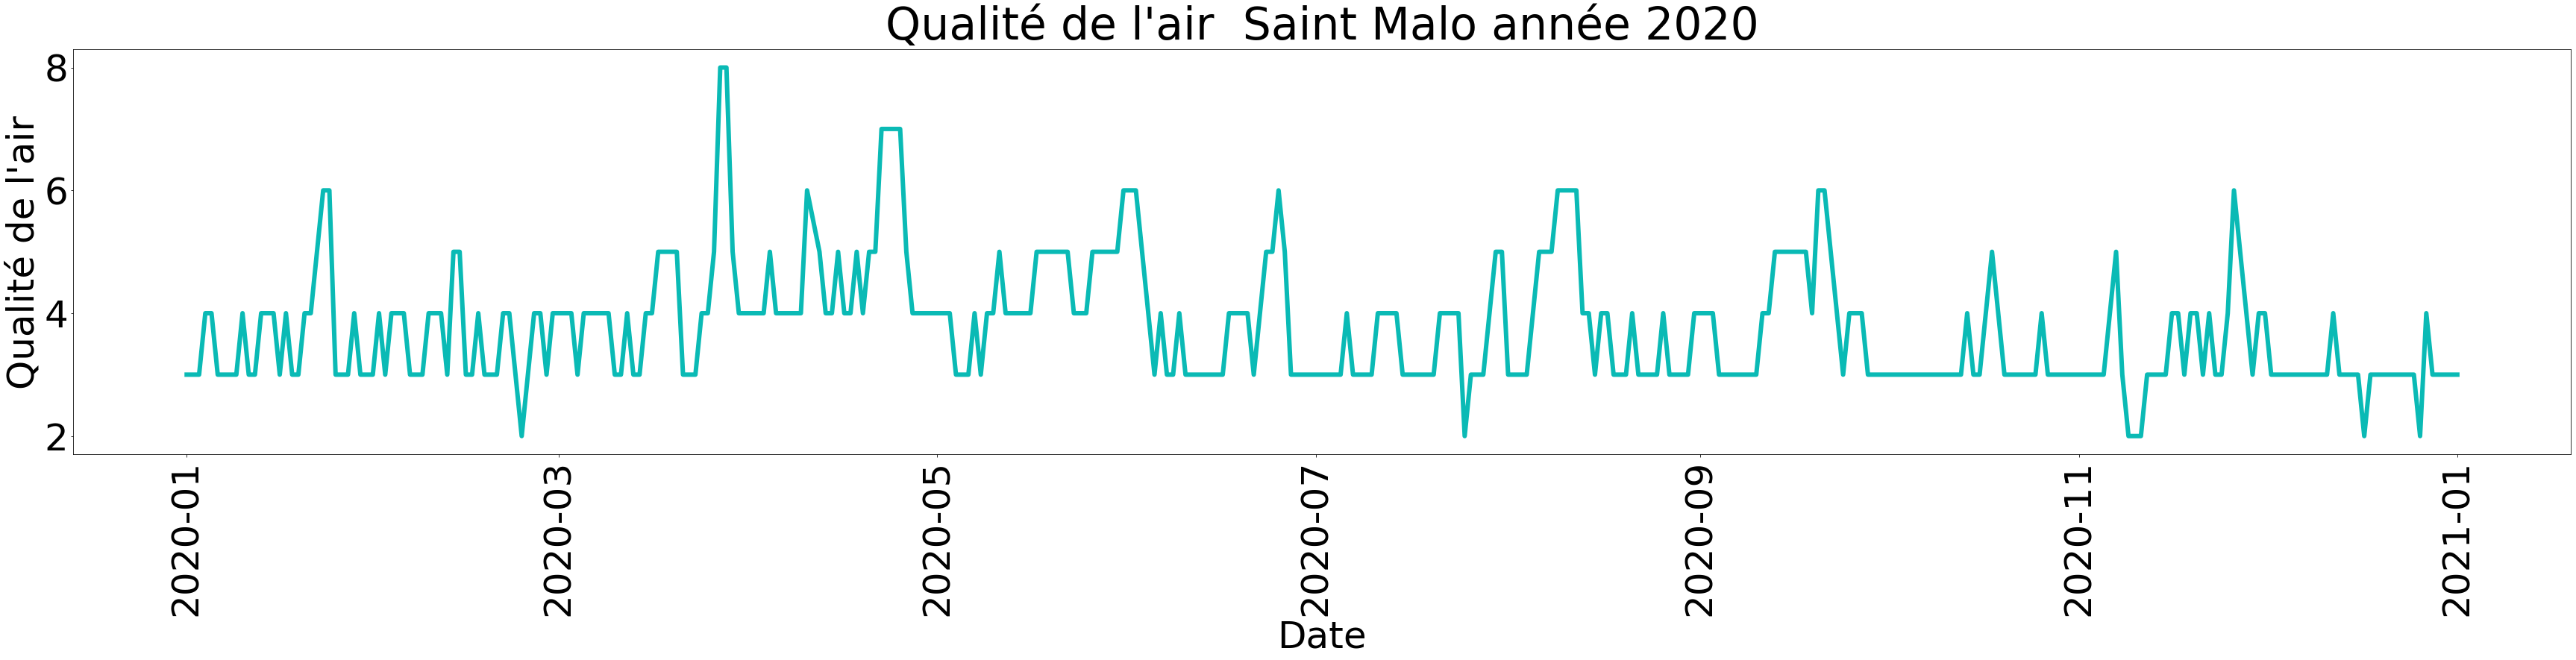

In [17]:
plt.title("Qualité de l'air Saint Brieuc année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x = saint_brieuc['date_ech']
y1 = saint_brieuc['valeur']
plt.plot(x, y1, color = 'red', linewidth=4)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


plt.title(" Qualité de l'air Vannes année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x2 = morbihan['date_ech']
y2 = morbihan['valeur']
plt.plot(x2, y2, color = 'green', linewidth=4)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()

plt.title(" Qualité de l'air  Quimper année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x3 = quimper['date_ech']
y3 = quimper['valeur']
plt.plot(x3, y3, color = 'orange', linewidth=4)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()

plt.title(" Qualité de l'air  Rennes année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x4 = rennes['date_ech']
y4 = rennes['valeur']
plt.plot(x4, y4, color = 'pink', linewidth=6)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


plt.title(" Qualité de l'air  Brest année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x5 = brest['date_ech']
y5 = brest['valeur']
plt.plot(x5, y5, color = 'cyan', linewidth=6)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


plt.title("Qualité de l'air  Lorient année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x6 = lorient['date_ech']
y6 = lorient['valeur']
plt.plot(x6, y6, color = 'brown', linewidth=6)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()


plt.title("Qualité de l'air  Saint Malo année 2020")
plt.rcParams['figure.figsize'] = (60, 10)
plt.rcParams['font.size'] = '50'
plt.xticks(rotation = '90')
x7 = st_malo['date_ech']
y7 = st_malo['valeur']
plt.plot(x7, y7, color = '#0ABAB5', linewidth=6)
plt.xlabel("Date")
plt.ylabel("Qualité de l'air")
plt.legend

plt.show()

on peut constater que les mois entre avril et mai 2020 ont été les mois avec le plus de polluants dans l'air ,pour chacunes des agglomérations,ce résultat est contradictoire,car il y aurait du avoir  moins de circulation cette période qui correspond au premier confinement.

Répartition de la qualité de l'air au global pour l'année 2020.

Text(0.5, 1.0, " Qualité de l'air en Bretagne: année 2020")

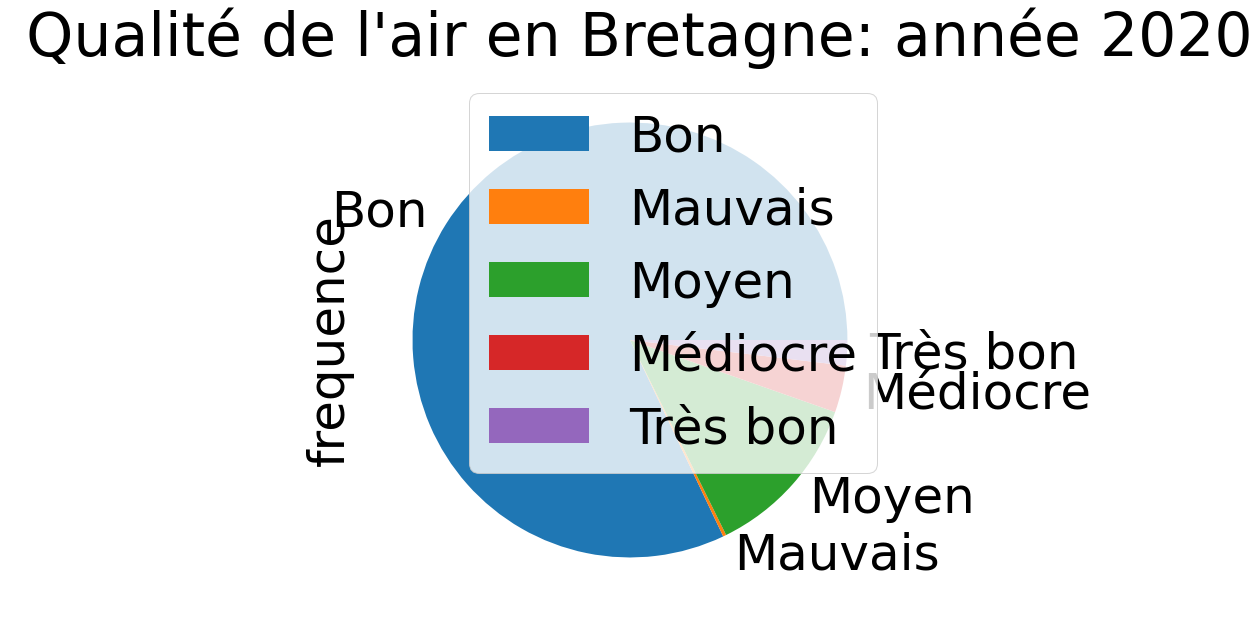

In [18]:
frequence = pd.crosstab(af.qualif,"frequence")
frequence.plot.pie(subplots=True)
plt.title(" Qualité de l'air en Bretagne: année 2020")

L'air en bretagne était plutôt bon en 2020 

# Répartition des polluants année 2020

<ipython-input-19-e1d36c0890c4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bf = af.groupby(af['date_ech'])["so2","no2", "o3", "pm10","pm25"].agg([np.mean])


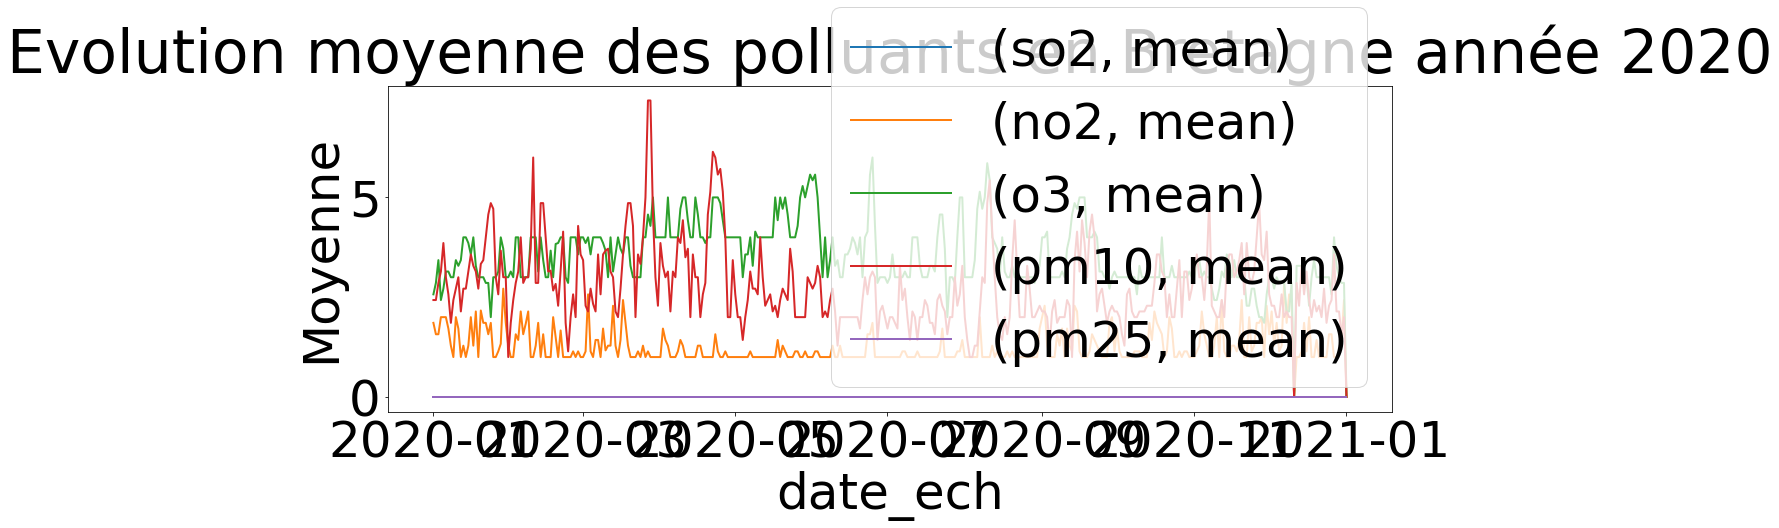

In [19]:
bf = af.groupby(af['date_ech'])["so2","no2", "o3", "pm10","pm25"].agg([np.mean])
bf.plot(linewidth=2, figsize=(18, 6))
plt.title("Evolution moyenne des polluants en Bretagne année 2020")
plt.ylabel("Moyenne")
plt.legend()

plt.show()

Ont constate que l'ozone est le plus présent avec les particules fines pm10,durant l'année 2020.

In [20]:
pollutt = af.groupby('lib_zone').mean()
pollutt

,valeur,no2,so2,o3,pm10,pm25
lib_zone,,,,,,
Brest Métropole,3.819945,1.290859,0.0,3.598338,2.916898,0.0
CA Golfe du Morbihan - Vannes,3.723288,1.263014,0.0,3.536986,2.632877,0.0
CA Lorient,3.731507,1.246575,0.0,3.550685,2.687671,0.0
CA Quimper Bretagne Occidentale,3.713115,1.150273,0.0,3.565574,2.655738,0.0
CA Saint-Brieuc Armor,3.660274,1.235616,0.0,3.479452,2.641096,0.0
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,1.181818,0.0,3.479339,3.011019,0.0
Rennes Métropole,3.646409,1.439227,0.0,3.411602,2.748619,0.0


La plus forte pollution se situe en premier pour Brest et qui est suivie de Rennes,le taux d'ozone est le plus fort suivi des particules fines pm10.

rajout des colonnes de points geom :latitude et longitude pour la cartographie.

In [21]:
longitude, latitude = [], []
for col, row, in af['geom'].iteritems():
    long = row.split('(')[1].split(' ')[0]
    lat = row.split('(')[1].split(' ')[1].split(')')[0]
    longitude.append(long)
    latitude.append(lat)

af.insert(2, 'Longitude', longitude, True)
af.insert(3, 'Latitude', latitude, True)

#Les variables "Longitude" et "Latitude" sont de type objet. On transforme en float.
af['Longitude'] = af['Longitude'].astype('float32')
af['Latitude'] = af['Latitude'].astype('float32')

af.drop(['Longitude', 'Latitude'], axis=1)
af

,date_ech,valeur,Longitude,Latitude,qualif,lib_zone,no2,so2,o3,pm10,pm25,geom
0,2021-01-01,3,269153.281250,6832825.0,Bon,CA Saint-Brieuc Armor,0,0,0,0,0,POINT (269153.2682993477 6832824.934141148)
1,2021-01-01,3,269961.125000,6746308.0,Bon,CA Golfe du Morbihan - Vannes,0,0,0,0,0,POINT (269961.1106939723 6746307.8992528645)
2,2021-01-01,3,172753.625000,6795400.5,Bon,CA Quimper Bretagne Occidentale,0,0,0,0,0,POINT (172753.63056731108 6795400.543816281)
3,2021-01-01,3,349555.000000,6789093.5,Bon,Rennes Métropole,0,0,0,0,0,POINT (349555.0070453745 6789093.386528317)
4,2021-01-01,3,338719.750000,6844014.0,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,0,0,0,0,0,POINT (338719.75810268405 6844013.788199687)
...,...,...,...,...,...,...,...,...,...,...,...,...
2542,2020-01-01,3,269153.281250,6832825.0,Bon,CA Saint-Brieuc Armor,2,0,2,3,0,POINT (269153.2682993477 6832824.934141148)
2543,2020-01-01,3,172753.625000,6795400.5,Bon,CA Quimper Bretagne Occidentale,2,0,3,2,0,POINT (172753.63056731108 6795400.543816281)
2544,2020-01-01,3,229772.046875,6768640.0,Bon,CA Lorient,2,0,3,2,0,POINT (229772.04043578357 6768639.926683848)
2545,2020-01-01,3,338719.750000,6844014.0,Bon,CA du Pays de Saint-Malo (Saint-Malo Aggloméra...,1,0,2,3,0,POINT (338719.75810268405 6844013.788199687)


moyenne des données par zone.

In [22]:
maps = af.groupby(by=['lib_zone']).mean()
maps

,valeur,Longitude,Latitude,no2,so2,o3,pm10,pm25
lib_zone,,,,,,,,
Brest Métropole,3.819945,147878.218750,6837176.0,1.290859,0.0,3.598338,2.916898,0.0
CA Golfe du Morbihan - Vannes,3.723288,269961.125000,6746308.0,1.263014,0.0,3.536986,2.632877,0.0
CA Lorient,3.731507,229772.046875,6768640.0,1.246575,0.0,3.550685,2.687671,0.0
CA Quimper Bretagne Occidentale,3.713115,172753.625000,6795400.5,1.150273,0.0,3.565574,2.655738,0.0
CA Saint-Brieuc Armor,3.660274,269153.281250,6832825.0,1.235616,0.0,3.479452,2.641096,0.0
CA du Pays de Saint-Malo (Saint-Malo Agglomération),3.757576,338719.750000,6844014.0,1.181818,0.0,3.479339,3.011019,0.0
Rennes Métropole,3.646409,349555.000000,6789093.5,1.439227,0.0,3.411602,2.748619,0.0


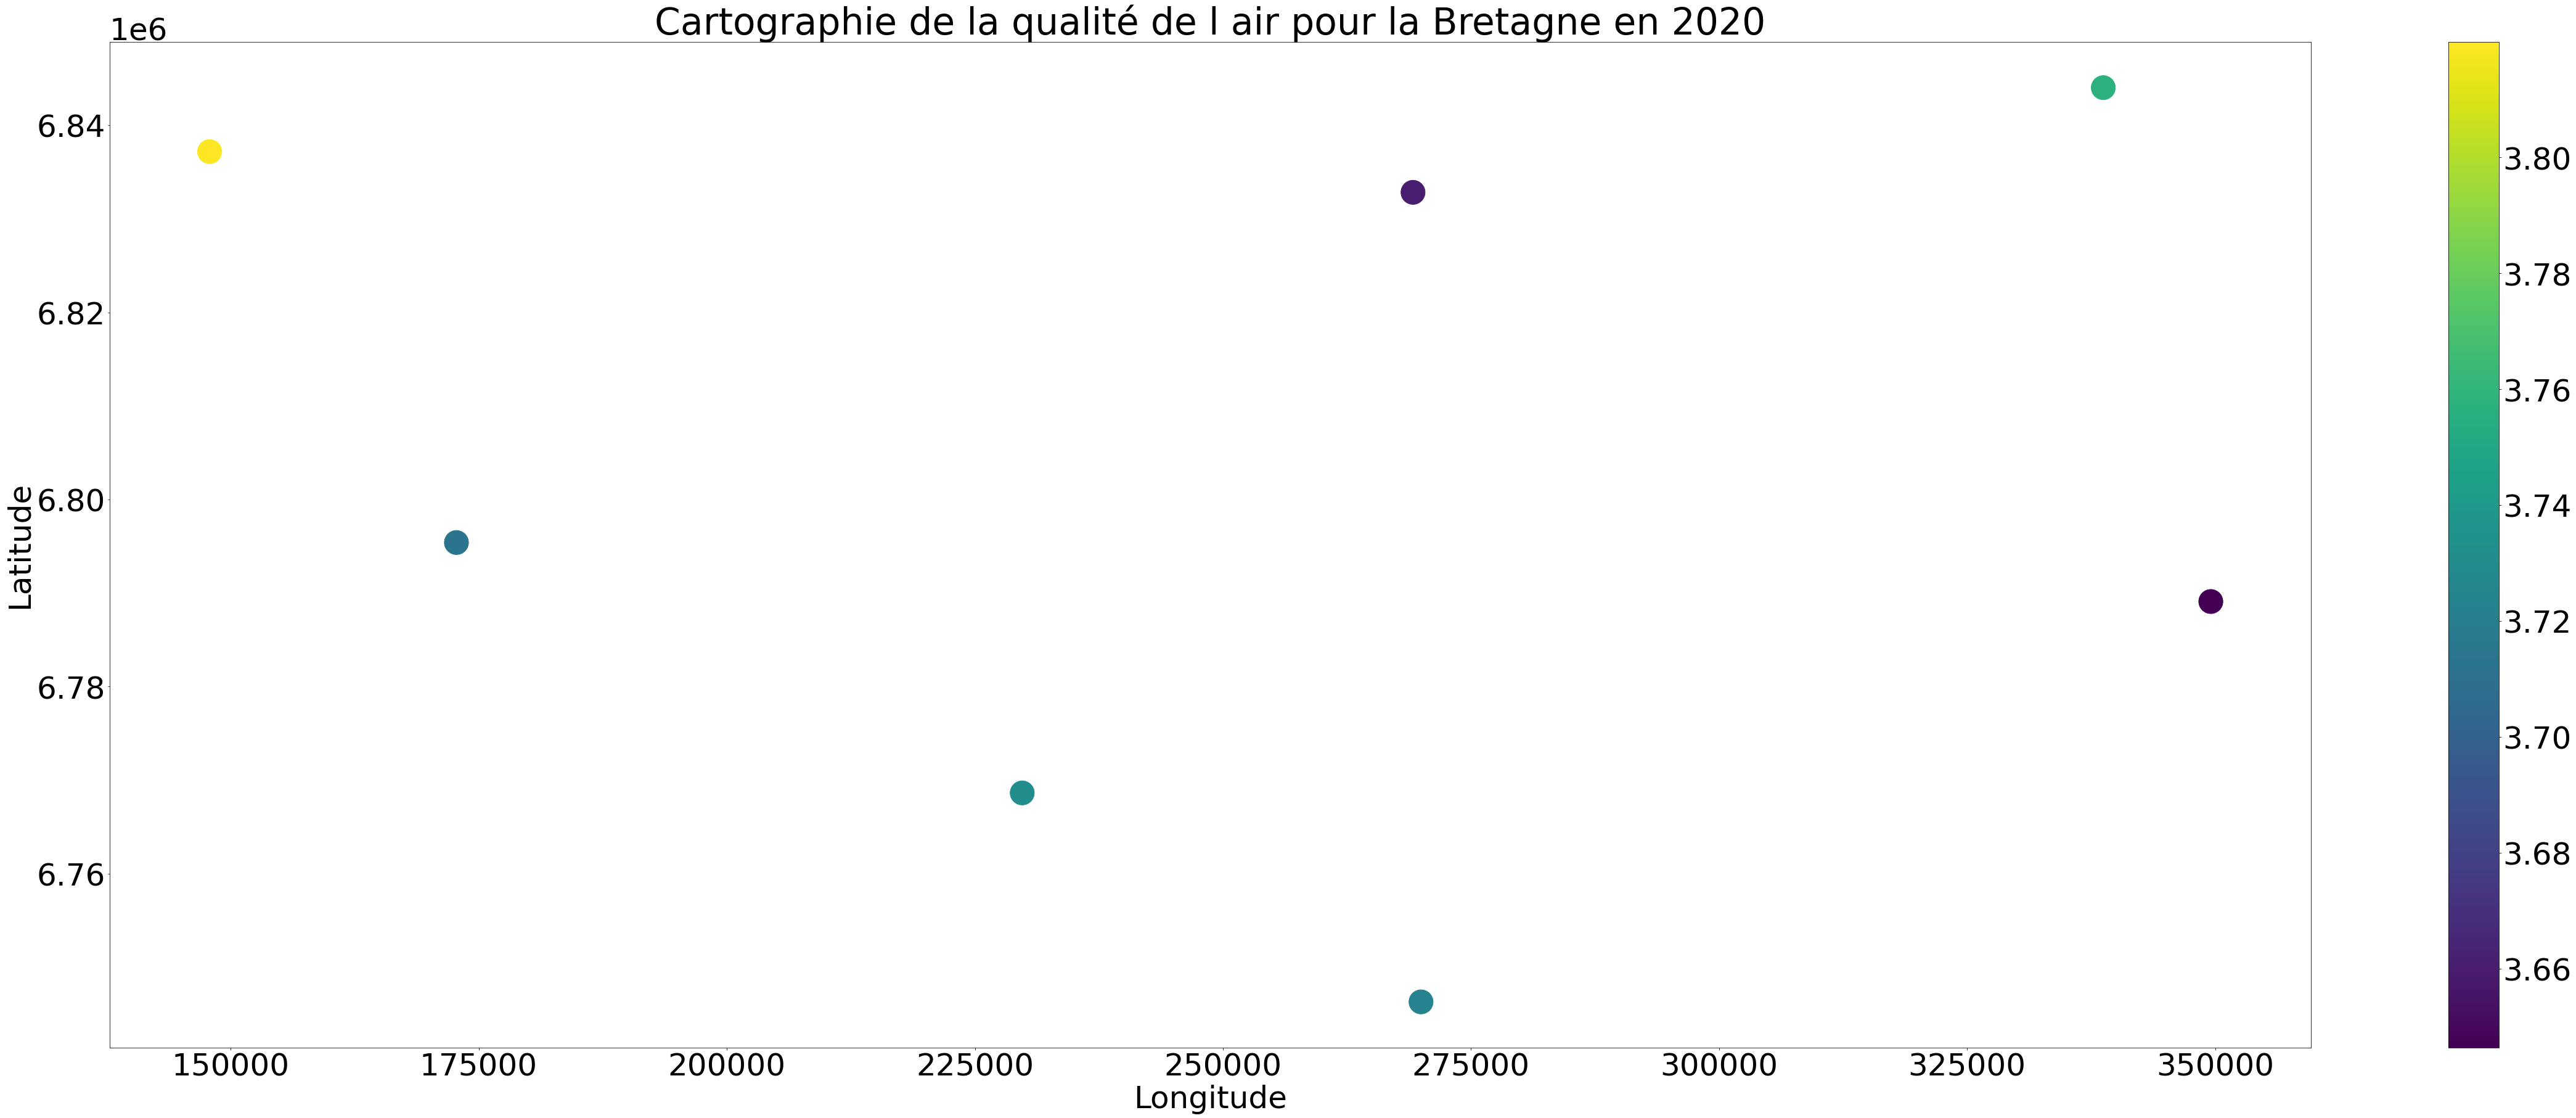

In [30]:
plt.figure(figsize=(80,30))
plt.scatter(maps['Longitude'],maps['Latitude'],c=maps['valeur'], s = 1530)
plt.colorbar()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Cartographie de la qualité de l air pour la Bretagne en 2020')
plt.show()